In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import torch

In [ ]:
!nvidia-smi

Sat Jul 23 18:32:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-settings

Unable to init server: Could not connect: Connection refused

ERROR: The control display is undefined; please run `nvidia-settings
       --help` for usage information.



In [ ]:
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
image = np.array(train_data.drop('label',axis=1).iloc[0])
label = train_data.iloc[0]['label']

TypeError: ignored

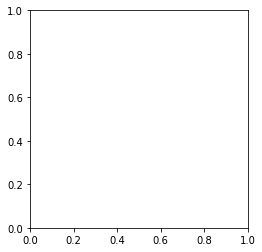

In [ ]:
plt.imshow(image.reshape(28,28,1), cmap='gray')
plt.axis('off')

In [ ]:
def visualise_random_image():
    index = np.random.randint(0,42000)
    image = np.array(train_data.drop('label',axis=1).iloc[index])
    label = train_data.iloc[index]['label']
    plt.imshow(image.reshape(28,28,1), cmap='gray')
    plt.title(label)  
    plt.axis('off')

TypeError: ignored

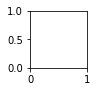

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(50):
    ax = plt.subplot(5, 10, i + 1)
    visualise_random_image()

In [ ]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

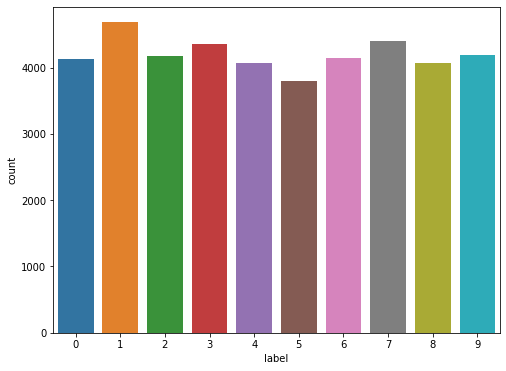

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=train_data)

In [ ]:
(train_data['label'].value_counts()/len(train_data))*100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [ ]:
X = train_data.drop('label', axis=1)
y = train_data['label']

In [ ]:
(x_train1, y_train1), (x_test1, y_test1) = tf.keras.datasets.mnist.load_data()

train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

Y_train1 = y_train1
X_train1 = train1.reshape(-1, 28*28)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = np.concatenate((X.values, X_train1))
y_train = np.concatenate((y, y_train1))

In [ ]:
X_train = X_train.reshape(-1,28,28,1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state=101)


In [ ]:
!nvidia-smi

Sat Jul 23 18:33:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.reshape(-1,28,28,1)
X_test.reshape(-1,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
X = X.values.reshape(-1,28,28,1)
X = X/255.0

In [ ]:
X.shape

(42000, 28, 28, 1)

In [ ]:
X_train1.shape

(70000, 784)

In [ ]:
X = np.concatenate((X, X_train1.reshape(-1, 28,28, 1)))
y = np.concatenate((y, y_train1))

In [ ]:
X.shape

(112000, 28, 28, 1)

In [ ]:
y.shape

(112000,)

In [ ]:
X = X/255


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16060828162039568274
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14444920832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11894905680121552307
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from numba import jit, cuda

In [ ]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numba
torch.cuda.is_available()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


True

In [ ]:
torch.info()

AttributeError: ignored

In [ ]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

model7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
#@jit(target ="cuda")
history = model7.fit(X,y,epochs=50)

Epoch 1/50
3500/3500 [==============================] - 34s 6ms/step - loss: 0.2150 - accuracy: 0.9298
Epoch 2/50
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0619 - accuracy: 0.9825
Epoch 3/50
3500/3500 [==============================] - 22s 6ms/step - loss: 0.0471 - accuracy: 0.9865
Epoch 4/50
3500/3500 [==============================] - 22s 6ms/step - loss: 0.0380 - accuracy: 0.9888
Epoch 5/50
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0325 - accuracy: 0.9907
Epoch 6/50
3500/3500 [==============================] - 19s 6ms/step - loss: 0.0278 - accuracy: 0.9918
Epoch 7/50
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 8/50
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0204 - accuracy: 0.9940
Epoch 9/50
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 10/50
3500/3500 [==============================] - 19s 5ms/step - l

In [ ]:
test_data = test_data/255.0
test_data = test_data.values.reshape(-1,28,28,1)

In [ ]:
predictions = model7.predict(test_data)
predictions = predictions.argmax(axis=1)
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)), 'Label': predictions})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
submission.to_csv('submission.csv', index=False)